In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("final-preprocessed-data.csv");

In [5]:
df.shape

(70773, 69)

In [6]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,threat_pgw,threat_rlf,threat_rsf,total_points_pgw,total_points_rlf,total_points_rsf,yellow_cards_pgw,yellow_cards_rlf,yellow_cards_rsf,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [7]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
assists_rlf               int64
assists_rsf               int64
bonus_pgw               float64
bonus_rlf                 int64
bonus_rsf                 int64
bps_pgw                 float64
bps_rlf                   int64
bps_rsf                   int64
clean_sheets_pgw        float64
clean_sheets_rlf          int64
clean_sheets_rsf          int64
creativity_pgw          float64
creativity_rlf          float64
creativity_rsf          float64
goals_conceded_pgw      float64
goals_conceded_rlf        int64
goals_conceded_rsf        int64
goals_scored_pgw        float64
goals_scored_rlf          int64
goals_scored_rsf          int64
                         ...   
opponent

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,70773.0,2017.061464,0.902534,2016.0,2016.00000,2017.00000,2018.000000,2019.0
GW,70773.0,19.507453,11.347524,1.0,9.00000,20.00000,30.000000,38.0
at_home,70773.0,0.499654,0.500003,0.0,0.00000,0.00000,1.000000,1.0
player_id,70773.0,486.980656,295.603861,1.0,239.00000,477.00000,700.000000,1211.0
opponent_id,70773.0,12.038334,7.271718,1.0,5.00000,11.00000,18.000000,29.0
champion_ls,70773.0,0.050358,0.218685,0.0,0.00000,0.00000,0.000000,1.0
top5_ls,70773.0,0.250745,0.433445,0.0,0.00000,0.00000,1.000000,1.0
bottom5_ls,70773.0,0.249191,0.432548,0.0,0.00000,0.00000,0.000000,1.0
promoted_ts,70773.0,0.149676,0.356756,0.0,0.00000,0.00000,0.000000,1.0
assists_pgw,70773.0,0.038956,0.209615,0.0,0.00000,0.00000,0.000000,3.0


In [9]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [10]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, 
                                                    random_state=random_state)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.70, 
                                                    random_state=random_state)

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train);

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
X_val_scaled = scaler.transform(X_val)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [16]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (49541, 66)
y train shape:  (49541, 1)


In [17]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (6370, 66)
y test shape:  (6370, 1)


In [18]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (14862, 66)
y val shape:  (14862, 1)


In [19]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential();
    
#     model.add(Dense(32, input_dim=dim, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(16, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(8, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(4, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(2, activation="elu"));
#     model.add(Dropout(dropout));
    
    model.add(Dense(1024, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(512, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(256, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(128, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(64, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(32, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"));
 
    # return our model
    return model

In [20]:
model = create_mlp(X_train.shape[1], dropout=0.1, l2_reg=0.001, regress=True)
opt = keras.optimizers.Adam(lr=0.00001)
model.compile(loss="mean_squared_error", optimizer=opt);

W0930 20:31:16.393298 4483118528 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 20:31:16.407402 4483118528 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 20:31:16.409677 4483118528 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 20:31:16.424854 4483118528 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0930 20:31:16.431332 4483118528 deprecati

In [21]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [22]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=500, shuffle=True, batch_size=128, callbacks=[es], verbose=1)

W0930 20:31:17.008172 4483118528 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 49541 samples, validate on 14862 samples
Epoch 1/500
49541/49541 [==============================] - 7s 146us/step - loss: 6.3004 - val_loss: 5.2186
Epoch 2/500
49541/49541 [==============================] - 7s 131us/step - loss: 5.4673 - val_loss: 5.1484
Epoch 3/500
49541/49541 [==============================] - 7s 132us/step - loss: 5.3871 - val_loss: 5.1305
Epoch 4/500
49541/49541 [==============================] - 7s 134us/step - loss: 5.3433 - val_loss: 5.1158
Epoch 5/500
49541/49541 [==============================] - 7s 132us/step - loss: 5.3198 - val_loss: 5.1022
Epoch 6/500
49541/49541 [==============================] - 7s 134us/step - loss: 5.2826 - val_loss: 5.0977
Epoch 7/500
49541/49541 [==============================] - 7s 134us/step - loss: 5.2712 - val_loss: 5.0871
Epoch 8/500
49541/49541 [==============================] - 7s 134us/step - loss: 5.2630 - val_loss: 5.0814
Epoch 9/500
49541/49541 [==============================] - 6s 131us/step - loss: 5.2177 - val_

49541/49541 [==============================] - 7s 133us/step - loss: 4.8465 - val_loss: 4.8261
Epoch 77/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.8494 - val_loss: 4.8217
Epoch 78/500
49541/49541 [==============================] - 7s 135us/step - loss: 4.8384 - val_loss: 4.8174
Epoch 79/500
49541/49541 [==============================] - 7s 133us/step - loss: 4.8501 - val_loss: 4.8121
Epoch 80/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.8361 - val_loss: 4.8108
Epoch 81/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.8332 - val_loss: 4.8145
Epoch 82/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.8267 - val_loss: 4.8081
Epoch 83/500
49541/49541 [==============================] - 7s 133us/step - loss: 4.8201 - val_loss: 4.8011
Epoch 84/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.8232 - val_loss: 4.7994
Epoch 85/500
49541/49541 [===============

49541/49541 [==============================] - 7s 136us/step - loss: 4.5940 - val_loss: 4.6121
Epoch 152/500
49541/49541 [==============================] - 7s 133us/step - loss: 4.5816 - val_loss: 4.6108
Epoch 153/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.5833 - val_loss: 4.6048
Epoch 154/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.5780 - val_loss: 4.6065
Epoch 155/500
49541/49541 [==============================] - 7s 132us/step - loss: 4.5766 - val_loss: 4.6012
Epoch 156/500
49541/49541 [==============================] - 7s 137us/step - loss: 4.5802 - val_loss: 4.6007
Epoch 157/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.5738 - val_loss: 4.5949
Epoch 158/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.5787 - val_loss: 4.5910
Epoch 159/500
49541/49541 [==============================] - 7s 137us/step - loss: 4.5640 - val_loss: 4.5892
Epoch 160/500
49541/49541 [======

49541/49541 [==============================] - 7s 135us/step - loss: 4.3924 - val_loss: 4.4451
Epoch 227/500
49541/49541 [==============================] - 7s 135us/step - loss: 4.3869 - val_loss: 4.4434
Epoch 228/500
49541/49541 [==============================] - 7s 133us/step - loss: 4.3984 - val_loss: 4.4372
Epoch 229/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.3875 - val_loss: 4.4388
Epoch 230/500
49541/49541 [==============================] - 7s 135us/step - loss: 4.3873 - val_loss: 4.4367
Epoch 231/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.3768 - val_loss: 4.4392
Epoch 232/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.3788 - val_loss: 4.4373
Epoch 233/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.3789 - val_loss: 4.4358
Epoch 234/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.3736 - val_loss: 4.4280
Epoch 235/500
49541/49541 [======

49541/49541 [==============================] - 7s 136us/step - loss: 4.2464 - val_loss: 4.3277
Epoch 302/500
49541/49541 [==============================] - 7s 137us/step - loss: 4.2421 - val_loss: 4.3223
Epoch 303/500
49541/49541 [==============================] - 7s 135us/step - loss: 4.2336 - val_loss: 4.3172
Epoch 304/500
49541/49541 [==============================] - 6s 129us/step - loss: 4.2318 - val_loss: 4.3164
Epoch 305/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.2305 - val_loss: 4.3204
Epoch 306/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.2292 - val_loss: 4.3157
Epoch 307/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.2236 - val_loss: 4.3185
Epoch 308/500
49541/49541 [==============================] - 7s 135us/step - loss: 4.2225 - val_loss: 4.3157
Epoch 309/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.2258 - val_loss: 4.3153
Epoch 310/500
49541/49541 [======

49541/49541 [==============================] - 7s 138us/step - loss: 4.1243 - val_loss: 4.2365
Epoch 377/500
49541/49541 [==============================] - 7s 137us/step - loss: 4.1106 - val_loss: 4.2325
Epoch 378/500
49541/49541 [==============================] - 7s 140us/step - loss: 4.1102 - val_loss: 4.2301
Epoch 379/500
49541/49541 [==============================] - 7s 140us/step - loss: 4.1116 - val_loss: 4.2341
Epoch 380/500
49541/49541 [==============================] - 7s 139us/step - loss: 4.1091 - val_loss: 4.2301
Epoch 381/500
49541/49541 [==============================] - 7s 133us/step - loss: 4.1099 - val_loss: 4.2332
Epoch 382/500
49541/49541 [==============================] - 7s 137us/step - loss: 4.1171 - val_loss: 4.2268
Epoch 383/500
49541/49541 [==============================] - 7s 138us/step - loss: 4.1049 - val_loss: 4.2233
Epoch 384/500
49541/49541 [==============================] - 7s 138us/step - loss: 4.1130 - val_loss: 4.2269
Epoch 385/500
49541/49541 [======

49541/49541 [==============================] - 7s 136us/step - loss: 4.0287 - val_loss: 4.1694
Epoch 452/500
49541/49541 [==============================] - 7s 137us/step - loss: 4.0258 - val_loss: 4.1707
Epoch 453/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.0183 - val_loss: 4.1716
Epoch 454/500
49541/49541 [==============================] - 7s 136us/step - loss: 4.0265 - val_loss: 4.1634
Epoch 455/500
49541/49541 [==============================] - 7s 138us/step - loss: 4.0215 - val_loss: 4.1709
Epoch 456/500
49541/49541 [==============================] - 7s 142us/step - loss: 4.0177 - val_loss: 4.1716
Epoch 457/500
49541/49541 [==============================] - 7s 134us/step - loss: 4.0113 - val_loss: 4.1646
Epoch 458/500
49541/49541 [==============================] - 7s 133us/step - loss: 4.0058 - val_loss: 4.1750
Epoch 459/500
49541/49541 [==============================] - 7s 135us/step - loss: 4.0141 - val_loss: 4.1651
Epoch 460/500
49541/49541 [======

In [23]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [24]:
y_true = np.array(y_test["total_points"]);

In [25]:
y_pred = model.predict(X_test_scaled);

In [26]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [27]:
pred_df["in_range"] = pred_df.apply(lambda row: True if 
                                    (row["Actual"] - row["Predicted"]) <= 1 else False, axis=1)


In [28]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.87


In [29]:
pred_df.head(25)

,Actual,Predicted,in_range
0,0.0,3.125529,True
1,0.0,0.231379,True
2,0.0,0.121945,True
3,9.0,2.650470,False
4,1.0,0.836452,True
5,0.0,0.167470,True
6,0.0,0.131989,True
7,1.0,0.682992,True
8,1.0,1.635103,True
9,0.0,2.756515,True


In [30]:
test_df = pred_df.head(25)

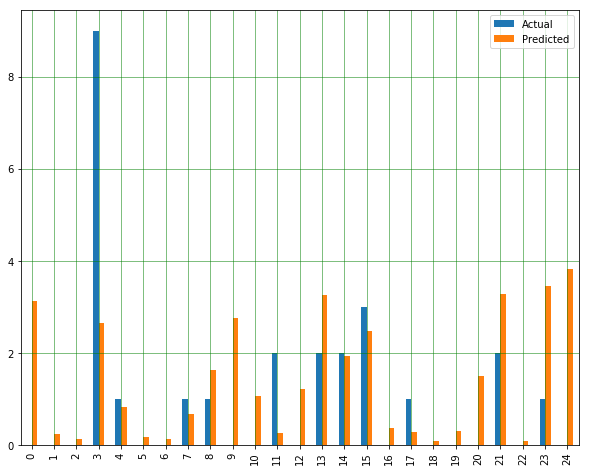

In [31]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

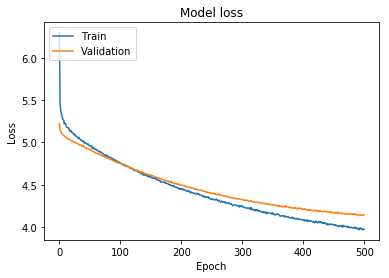

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1428835820051273
R2 score: 0.2900606432426879
Mean Squared Error: 3.6535758227605575
Root Mean Squared Error: 1.9114329239501338


In [34]:
player_id_df = pd.read_csv("player_id_map.csv");

In [35]:
team_id_df = pd.read_csv("team_id_map.csv");

In [36]:
# load and the test weekly fpl scrape
gw=7
weekly_scrape = pd.read_csv("gw{}-fpl-data.csv".format(gw));

In [37]:
X_test.columns

Index(['at_home', 'player_id', 'opponent_id', 'champion_ls', 'top5_ls',
       'bottom5_ls', 'promoted_ts', 'assists_pgw', 'assists_rlf',
       'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf', 'bps_pgw',
       'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'result_pgw',
       'result_

In [38]:
weekly_scrape_scaled = scaler.transform(weekly_scrape[X_test.columns]);

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [39]:
y_pred_weekly = model.predict(weekly_scrape_scaled);

In [40]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 
                                 'position': list(weekly_scrape["position"]),
                                 'predicted': y_pred_weekly.flatten()});


In [41]:
player_names = [];
opponent_names = [];

for index, row in weekly_scrape.iterrows():
    player_id = row["player_id"];
    opponent_id = row["opponent_id"];
    
    player_names.append(player_id_df[player_id_df["player_id"] == player_id]["actual_name"].iloc[0]);
    opponent_names.append(team_id_df[team_id_df["team_id"] == opponent_id]["team_name"].iloc[0]);

In [42]:
y_pred_weekly_df["player_name"] = player_names;
y_pred_weekly_df["opponent"] = opponent_names;

In [43]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "position", "player_name", "opponent", "predicted"]];

In [44]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,position,player_name,opponent,predicted
5,451,DEF,Martin Kelly,Norwich City,5.259672
9,1176,MID,Mason Mount,Brighton and Hove Albion,5.030162
8,267,MID,Harry Wilson,West Ham United,4.970465
11,1206,MID,Todd Cantwell,Crystal Palace,3.591277
13,1204,FWD,Teemu Pukki,Crystal Palace,3.325412
6,1154,DEF,John Lundstram,Liverpool,3.316150
2,648,DEF,Trent Alexander-Arnold,Sheffield United,3.181467
14,858,FWD,Pierre-Emerick Aubameyang,Manchester United,3.084192
1,947,GK,David Button,Chelsea,2.841447
4,977,DEF,Issa Diop,Bournemouth,2.797502


In [45]:
cond_gk_min = 1;

cond_def_min = 3;
cond_def_max = 5;

cond_mid_min = 2;
cond_mid_max = 5;

cond_fwd_min = 1;
cond_fwd_max = 3;

In [46]:
def selectTeam(df, max_players=11):
    best11 = y_pred_weekly_df.sort_values(["predicted"], ascending=False)
    df_ = pd.DataFrame(columns=best11.columns);

    for index, row in best11.iterrows():
        num_gk = df_[df_["position"] == "GK"].shape[0];
        num_def = df_[df_["position"] == "DEF"].shape[0];
        num_mid = df_[df_["position"] == "MID"].shape[0];
        num_fwd = df_[df_["position"] == "FWD"].shape[0];
        num_players = df_.shape[0];
        
        position = row["position"];
    
        if (position == "GK" and num_gk < cond_gk_min and num_players < max_players):
            df_ = df_.append(row);
        if (position == "DEF" and (num_def < cond_def_min or 
            (num_def >= cond_def_min and num_def <= cond_def_max)) and num_players < max_players):
            df_ = df_.append(row);
        if (position == "MID" and (num_mid < cond_mid_min or 
            (num_mid >= cond_mid_min and num_mid <= cond_mid_max)) and num_players < max_players):
            df_ = df_.append(row);
        if (position == "FWD" and (num_fwd < cond_fwd_min or 
            (num_fwd >= cond_fwd_min and num_fwd <= cond_fwd_max)) and num_players < max_players):
            df_ = df_.append(row);
    
    gk = list(df_[df_["position"] == "GK"]["player_name"])
    defenders = list(df_[df_["position"] == "DEF"]["player_name"])
    mids = list(df_[df_["position"] == "MID"]["player_name"])
    fwds = list(df_[df_["position"] == "FWD"]["player_name"])
    
    selectedTeam = pd.DataFrame(columns=df_.columns);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "GK"]);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "DEF"]);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "MID"]);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "FWD"]);
    
    selectedTeam["predicted"] = selectedTeam["predicted"].apply(lambda pred: round(pred, 0))
    
    return selectedTeam

In [47]:
best11 = selectTeam(y_pred_weekly_df);

In [48]:
best11

,player_id,position,player_name,opponent,predicted
1,947,GK,David Button,Chelsea,3.0
5,451,DEF,Martin Kelly,Norwich City,5.0
6,1154,DEF,John Lundstram,Liverpool,3.0
2,648,DEF,Trent Alexander-Arnold,Sheffield United,3.0
4,977,DEF,Issa Diop,Bournemouth,3.0
9,1176,MID,Mason Mount,Brighton and Hove Albion,5.0
8,267,MID,Harry Wilson,West Ham United,5.0
11,1206,MID,Todd Cantwell,Crystal Palace,4.0
7,585,MID,Sadio Mané,Sheffield United,3.0
13,1204,FWD,Teemu Pukki,Crystal Palace,3.0


In [49]:
sum(best11["predicted"])

40.0

In [50]:
best11.to_csv("gw{}-best11.csv".format(gw), index=False);